##**Breast Cancer Prediction**

Breast cancer is a disease in which cells in the breast grow out of control. There are different kinds of breast cancer. The kind of breast cancer depends on which cells in the breast turn into cancer

Attribute Information:

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

##Importing the Dependencies

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##Data Collection & Preprocessing

In [137]:
df=pd.read_csv('/content/data.csv')

In [138]:
#displaying first 5 rows of the dataframe
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [139]:
df.shape

(569, 33)

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [141]:
#checking null values in dataset
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [142]:
df['Target']=pd.get_dummies(df['diagnosis'],drop_first=True)

In [143]:
#removing unwanted values
df.drop(['id','diagnosis','Unnamed: 32'],axis=1,inplace=True)

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

In [145]:
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [146]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


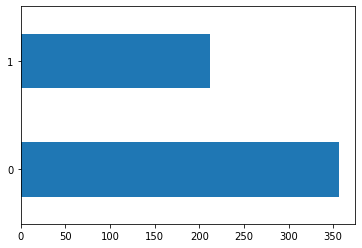

In [147]:
#checking the distribution of target column
df['Target'].value_counts().plot(kind='barh')



*   1-->Malignant
*   0-->Benign



In [148]:
df.groupby('Target').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
Target,,,,,,,,,,,,,,,,,,,,,
0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


##Seperating the data to train and test

In [149]:
x=df.drop(columns='Target',axis=1)
y=df['Target']

In [150]:
from sklearn.model_selection import train_test_split

In [151]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

###Standardizing the data

In [152]:
from sklearn.preprocessing import StandardScaler

In [153]:
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)

##**Building the Neural Network**

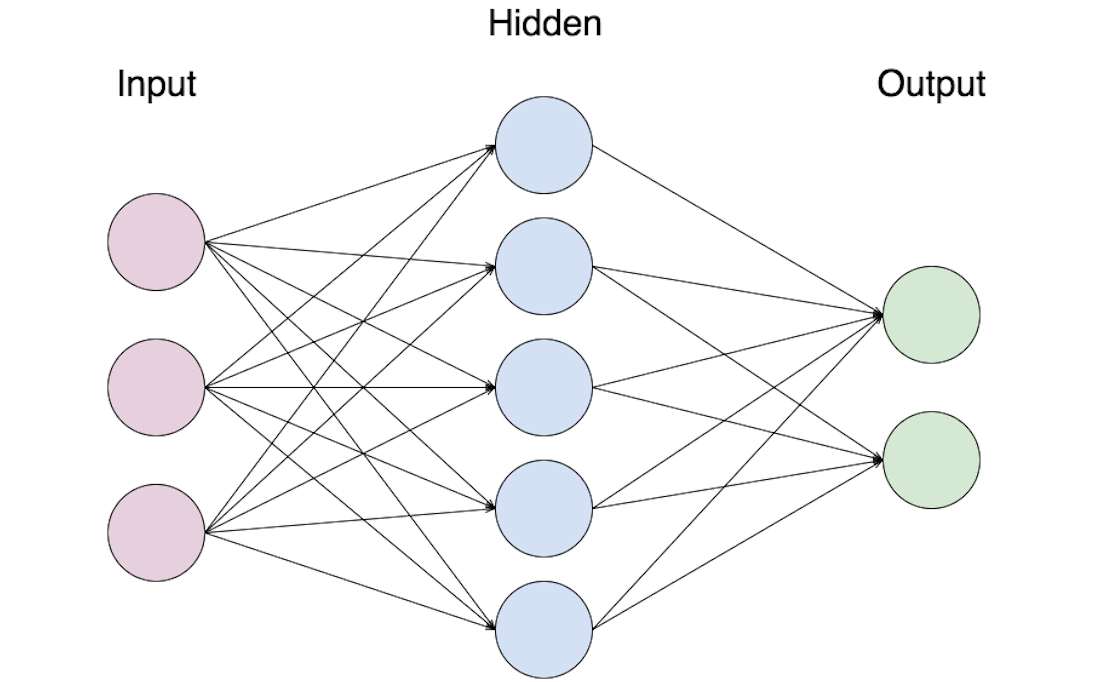

In [154]:
#importing the requird libraries for Neural Network implementation
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [155]:
#setting up the layers of Neural Network
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)),
    keras.layers.Dense(20,activation='relu'),
    keras.layers.Dense(2,activation='sigmoid')
])


In [156]:
#compiling the Neural Network
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [157]:
#training the Neural Network
history=model.fit(x_train_std,y_train,validation_split=0.1,epochs=10)

Epoch 1/10
13/13 [==============================] - 1s 17ms/step - loss: 0.8394 - accuracy: 0.5208 - val_loss: 0.6459 - val_accuracy: 0.6087
Epoch 2/10
13/13 [==============================] - 0s 4ms/step - loss: 0.5768 - accuracy: 0.6895 - val_loss: 0.4451 - val_accuracy: 0.7174
Epoch 3/10
13/13 [==============================] - 0s 4ms/step - loss: 0.4163 - accuracy: 0.8289 - val_loss: 0.3368 - val_accuracy: 0.9130
Epoch 4/10
13/13 [==============================] - 0s 4ms/step - loss: 0.3287 - accuracy: 0.8973 - val_loss: 0.2725 - val_accuracy: 0.9565
Epoch 5/10
13/13 [==============================] - 0s 4ms/step - loss: 0.2724 - accuracy: 0.9242 - val_loss: 0.2326 - val_accuracy: 0.9565
Epoch 6/10
13/13 [==============================] - 0s 4ms/step - loss: 0.2348 - accuracy: 0.9315 - val_loss: 0.2040 - val_accuracy: 0.9565
Epoch 7/10
13/13 [==============================] - 0s 4ms/step - loss: 0.2047 - accuracy: 0.9413 - val_loss: 0.1829 - val_accuracy: 0.9783
Epoch 8/10
13/13 [=

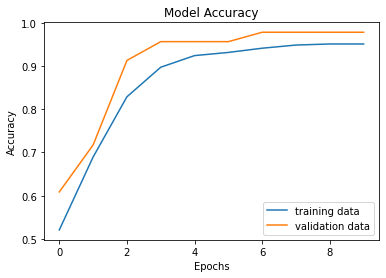

In [158]:
#Visualizing the accuracy of the train and validation
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(['training data','validation data'],loc="lower right")

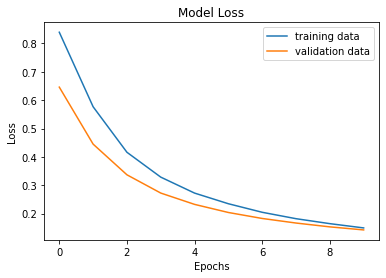

In [159]:
#Visualizing the loss of the train and validation
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(['training data','validation data'],loc="upper right")

###Accuracy of the model on test data

In [160]:
loss,accuracy=model.evaluate(x_test_std,y_test)
print(accuracy)

4/4 [==============================] - 0s 3ms/step - loss: 0.1604 - accuracy: 0.9561
0.9561403393745422


####Predicting the values for X_Test

In [161]:
y_pred=model.predict(x_test_std)

4/4 [==============================] - 0s 3ms/step


In [162]:
print(y_pred[0]) #if the first is max it predicts as Malignant,if second value is max it predicts as Benign

[0.5541773  0.20790856]


In [163]:
print(y_pred)

[[0.5541773  0.20790856]
 [0.49861762 0.49892735]
 [0.87142277 0.02503939]
 [0.00880304 0.9633942 ]
 [0.4399775  0.3368468 ]
 [0.10117894 0.8492868 ]
 [0.68985325 0.23536348]
 [0.78473693 0.02588076]
 [0.7322393  0.09810442]
 [0.7113483  0.08164235]
 [0.53256816 0.39664316]
 [0.65239674 0.15553382]
 [0.6033017  0.09662864]
 [0.5788265  0.2860563 ]
 [0.8564143  0.06409442]
 [0.34572288 0.59436697]
 [0.75522935 0.06014591]
 [0.6582765  0.04596106]
 [0.82053316 0.05275993]
 [0.07176702 0.85783756]
 [0.36897174 0.05573625]
 [0.69326437 0.02763664]
 [0.6398486  0.12965997]
 [0.80904824 0.02107892]
 [0.60185206 0.13961434]
 [0.22412595 0.58851594]
 [0.56976444 0.11229815]
 [0.45178175 0.14740892]
 [0.42199707 0.5034571 ]
 [0.33092892 0.62281305]
 [0.6502865  0.11292417]
 [0.7372482  0.15390962]
 [0.6846158  0.04020876]
 [0.14554618 0.77229583]
 [0.1397779  0.8538061 ]
 [0.54812115 0.1946014 ]
 [0.73384905 0.04388786]
 [0.6160699  0.22838122]
 [0.73258847 0.02340726]
 [0.68251085 0.10873835]


####Since the prediction of x_test_std gives the probability of each class,so converting the prediction probablity to its class labels

In [164]:
y_pred_labels=[np.argmax(i) for i in y_pred]

In [165]:
print(y_pred_labels)

[0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1]


In [166]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay

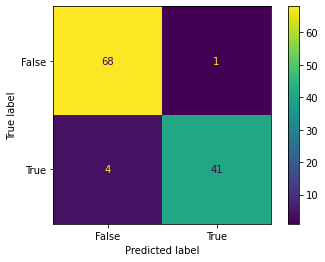

In [167]:
cm=confusion_matrix(y_test,y_pred_labels)
cm_display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[False,True])
cm_display.plot()
plt.show()

###Building the Predictive System

In [168]:
input_data=(17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189)
#converting the data to numpy array
input=np.asarray(input_data)

#reshape the numpy array as we are predicting for one data point
input_data_reshaped=input.reshape(1,-1)

# standardizing the input data
input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0] == 1):
  print('The Tumor is Malignant')

else:
  print('The Tumor is Benign')

1/1 [==============================] - 0s 20ms/step
[[0.01409065 0.76101005]]
[1]
The Tumor is Malignant


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
